In [1]:
library(data.table)
library(ggplot2)
library(patchwork)

In [2]:
# read data
a = fread('../lstat/output/shift_1900_stacking.csv')
b = fread('../lstat/output/bs_shift_1900.csv')
c = fread('../lstat/output/bs_shift_1900_uniform.csv')

In [3]:
countries = unique(a[year<1950, ctry])

plots = list()

for (i in countries) {

sa = a[ctry==i & segment=='1950' & year==1950]
sa[, estimate := 'No bootstrap']  
    
sb = b[ctry==i & segment=='1950' & year==1950]
sb[, estimate := 'Bootstrap with probabilities']

sc = c[ctry==i & segment=='1950' & year==1950]
sc[, estimate := 'Bootstrap with uniform probabilities']
 
df = rbind(sa, sb, sc, fill=TRUE)
    
plots[[i]] = ggplot(df, aes(shift_pred, fill = estimate, colour = estimate)) +
  geom_density(alpha = 0.1) + labs(title=paste('Shift (pred) ', i, ' 1950, Segment <1950'))
    
}

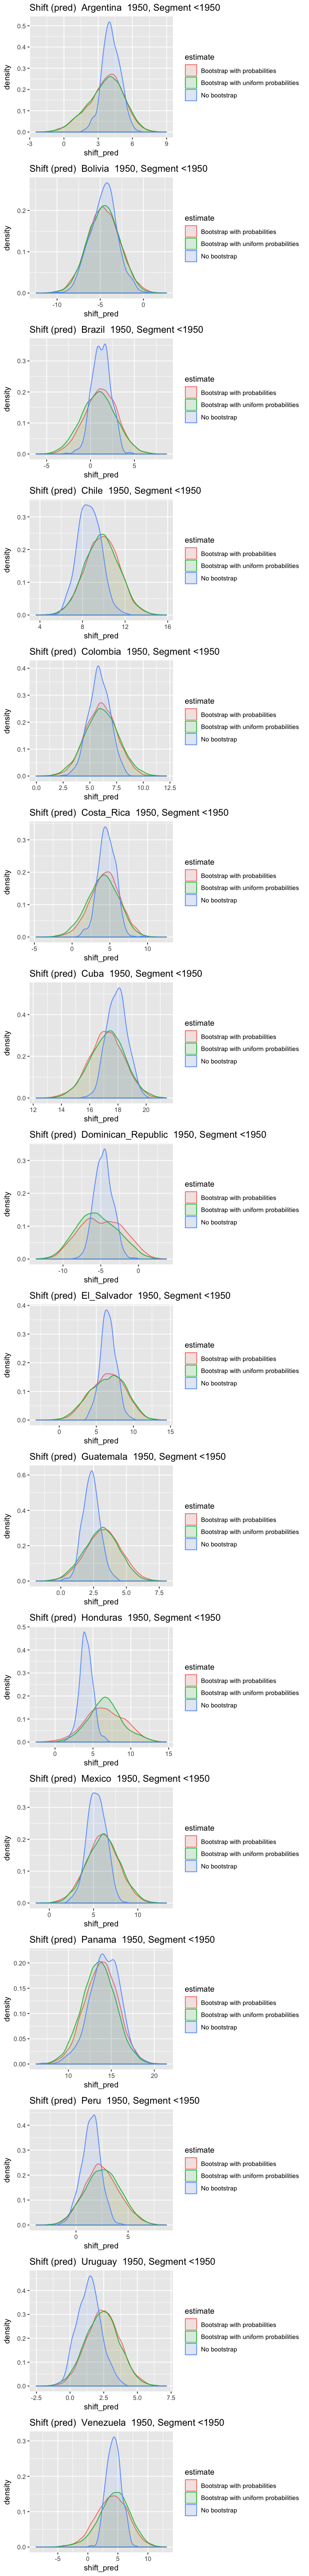

In [4]:
options(repr.plot.width=6, repr.plot.height=50)
wrap_plots(plots, ncol=1)
